# **Youtube Trending Videos in Germany**
![YouTube German](https://scontent-ham3-1.xx.fbcdn.net/v/t1.6435-9/98999650_114060636985994_5200488797342531584_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=09cbfe&_nc_ohc=blCc_MrY-skAX_DvxcC&_nc_ht=scontent-ham3-1.xx&oh=00_AT_2v8KSLQ19fxQXyhFALoltbP_La-wddDuqNMIFCcfIPQ&oe=62C2166F)
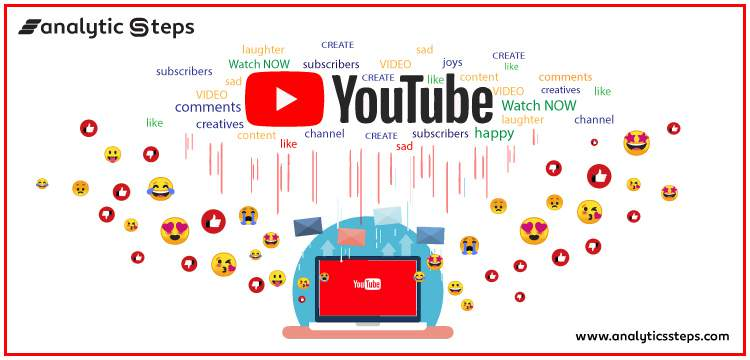

The dataset used in the analysis was taken from Kaggle [here](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=DE_youtube_trending_data.csv).

**Dataset description**: This dataset is a daily record of the top trending YouTube videos and it will be updated daily.

**Content**: This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the IN, US, GB, DE, CA, FR, RU, BR, MX, KR, and JP regions (India, USA, Great Britain, Germany, Canada, France, Russia, Brazil, Mexico, South Korea, and, Japan respectively), with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

*For this analysis in particular a dataset from Germany will be used.*
*The version of the dataset was downloaded on 05.06.2022.*

*Due to the fact that dataset itself exceeds GitHub's limit, in order to work it would need to be extracted from the provided zip archive.*

## Checking Python version

In [1]:
import sys
print(sys.version)

3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:32:50) [MSC v.1929 64 bit (AMD64)]


My intention is to test Python 3.10, its features and compatibility if I come across any of these points during the analysis. If not -- at least it should be able to do the job anyway.

## Data Preparation

In [2]:
# Import section

# Data wrangling libraries
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Loading the dataset
yt_trending = pd.read_csv('DE_youtube_trending_data.csv', parse_dates=['publishedAt', 'trending_date'])

In [4]:
# Checking the dimensions
yt_trending.shape

(133342, 16)

In [5]:
# Having a look at the first 15 rows
yt_trending.head(15)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11 18:00:03+00:00,UCGh8tmH9x9njaI2mXfh2fyg,CrhymeTV,10,2020-08-12 00:00:00+00:00,187|187 Strassenbande|BONEZ MC|RAF Camora|MAXW...,573902,69319,970,3311,https://i.ytimg.com/vi/KJi2qg5F-9E/default.jpg,False,False,Hollywood Fanbox vorbestellen ► http://bonezmc...
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11 17:00:09+00:00,UCnrvUg5MJWPDSrv_voT7AqA,Köln 50667,24,2020-08-12 00:00:00+00:00,Köln|50667|RTL2|RTL|Serie|k50667|ganze folge|t...,381375,13637,435,866,https://i.ytimg.com/vi/K0vYnOn7wZI/default.jpg,False,False,"Toni gerät in Panik, als plötzlich ein Unbekan..."
2,2bbn9b79LRc,Camper Tour 2020 - ROADTRIP durch Österreich |...,2020-08-11 18:00:00+00:00,UCBt8RY61tvanrhkzeZdNICw,AnaJohnson,24,2020-08-12 00:00:00+00:00,camper tour|camper tour deutsch|camper tour de...,142296,9480,144,364,https://i.ytimg.com/vi/2bbn9b79LRc/default.jpg,False,False,"Mehr von unserem Trip quer durch Deutschland, ..."
3,Zv-3qNnAMaM,Ich TESTE SHEIN BIKINIS (try on haul) - UNMÖGL...,2020-08-12 09:00:08+00:00,UCccDoH6QpRCjjcMgl5f88wA,Einfach Marci,24,2020-08-12 00:00:00+00:00,[None],55640,3420,124,229,https://i.ytimg.com/vi/Zv-3qNnAMaM/default.jpg,False,False,"Heii Cuties,Was soll ich in kommender Zeit noc..."
4,7clgQLneouU,STATEMENT zu meinem BAN! 😒 | Bald vielleicht P...,2020-08-11 12:00:02+00:00,UC8E8eD7mOcnMazJT4laKbFQ,Domo,24,2020-08-12 00:00:00+00:00,Papaplatte|papaplatte twitch best of|papaplatt...,233899,25251,375,1051,https://i.ytimg.com/vi/7clgQLneouU/default.jpg,False,False,Domo hier! Abonnieren! Liken! Genießen!\r\rWen...
5,g7vdQgRsTKc,Bayer unterliegt abgezockten Mailändern: Inter...,2020-08-10 22:00:08+00:00,UCNxq-0KJ0N3C3QfUWhLxNkw,DAZN UEFA Europa League,17,2020-08-12 00:00:00+00:00,Inter|Inter Mailand|Leverkusen|Bayer Leverkuse...,623938,12770,357,1514,https://i.ytimg.com/vi/g7vdQgRsTKc/default.jpg,False,False,In Düsseldorf kommt es zum Viertelfinal-Duell ...
6,86gzh8jftSE,GEBRAUCHTER Schrott - Die neue Masche?,2020-08-11 17:00:05+00:00,UCzH549YlZhdhIqhtvz7XHmQ,AlexiBexi,24,2020-08-12 00:00:00+00:00,[None],249531,17199,304,812,https://i.ytimg.com/vi/86gzh8jftSE/default.jpg,False,False,Gebrauchtes Zeug auf #SchinaSchrott Portalen.....
7,YECPzRfksl4,Erkennst DU den Song? (mit unsympathischTV) - ...,2020-08-11 15:00:08+00:00,UCL5-tPmf_sttES7ZcYJRp5A,World Wide Wohnzimmer,24,2020-08-12 00:00:00+00:00,world wide wohnzimmer|worldwidewohnzimmer|twin...,470201,43045,369,1719,https://i.ytimg.com/vi/YECPzRfksl4/default.jpg,False,False,Zum dritten Mal dabei: Sascha kann's nicht las...
8,gi3VMMiFHVg,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12 02:30:32+00:00,UC9-OpMMVoNP5o10_Iyq7Ndw,Bleacher Report,17,2020-08-12 00:00:00+00:00,bleacher report|br|nba|giannis|giannis antetok...,756814,8278,331,2441,https://i.ytimg.com/vi/gi3VMMiFHVg/default.jpg,False,False,"In a random and wild sequence of events, Giann..."
9,6QPDHBdSnrM,Günstige Bikinis aus dem Internet testen .. *s...,2020-08-11 12:30:00+00:00,UCPf0PECedlIt6fM87lxyn8Q,Sonny Loops,26,2020-08-12 00:00:00+00:00,bikini try on|bikini try on haul|günstige|biki...,154766,11261,673,733,https://i.ytimg.com/vi/6QPDHBdSnrM/default.jpg,False,False,Viel Spaß bei dem Bikini Try on Haul!Günstige ...


## Data Exploration

In [6]:
# Checking which years this dataset covers
yt_trending['publishedAt'].dt.year.unique()

array([2020, 2021, 2022], dtype=int64)

The dataset is fairly fresh, as it was expected. However, considering there is a `dislikes` column we will likely run into the issue when after some time the number of dislikes will be missing.

In [7]:
# Checking how many unique channels are included
yt_trending['channelTitle'].nunique()

6048

In [8]:
# Checking for null values across the entire dataset
yt_trending.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3662
dtype: int64

As we can see, no dislikes are missing from the dataset and, therefore, they are, probably, set to zero instead.

In [9]:
(yt_trending.dislikes == 0).sum()

35368

In [10]:
(yt_trending.dislikes != 0).sum()

97974

The sum should be around 133k which corresponds to the total number of entries, meaning that indeed when dislikes were disabled by YouTube in this dataset they were set to zero. Naturally, it is also taken into account that some videos had 0 dislikes to begin with.

We will have a detailed look at it in the next section.

### Short summary
The dataset contains data on trending YouTube videos of 6048 channels across the three years (2020, 2021, 2022).

Additionally, in 3662 entries there are missing descriptions.

Also, after some point in time all the dislikes have a value of zero.

## Handling the missing descriptions

Due to descriptions being plain text, a reasonable way to handle the missing one, would be to replace them with a clear indication that the description is missing.

In [11]:
yt_trending['description'] = yt_trending['description'].fillna('The description was not provided!')

In [12]:
# Checking for null values across the entire dataset once more
yt_trending.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

## Dealing with the dislike count

As we are doing a sentiment analysis here and not a machine learning, there is no real need to somehow manipulate the data for the sake of dislikes.
However, when later on we will be *SPOILER xD* having a look at the relationship between views and dislikes, we wouldn't be able to fit linear regression to the entire dataset properly. Therefore, we need to locate the date when dislikes were disabled and select that as a cutoff point for our regression.

While we could, naturally start with a straightforward approach of looking directly at the data, I opted out to make it a little bit easier for myself and used Google.

YouTube dislikes were disabled starting at 01.11.2021. But there is one catch...

<AxesSubplot:xlabel='publishedAt', ylabel='dislikes'>

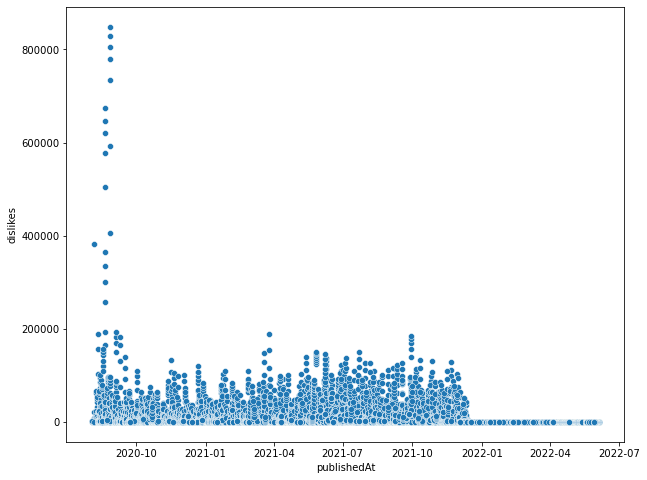

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=yt_trending, x = 'publishedAt', y = 'dislikes')

It looks like the dislikes didn't really go away in November...

The reason is simple: this dataset was not scrapped but collected using YouTube's API. And, it turns out, that in the API dislikes were available up to the 13th of December 2021 (excluded).

That explains a lot. Now let's have a closer look at this period to find the timestamp with the last published video with dislikes count.

<AxesSubplot:xlabel='publishedAt', ylabel='dislikes'>

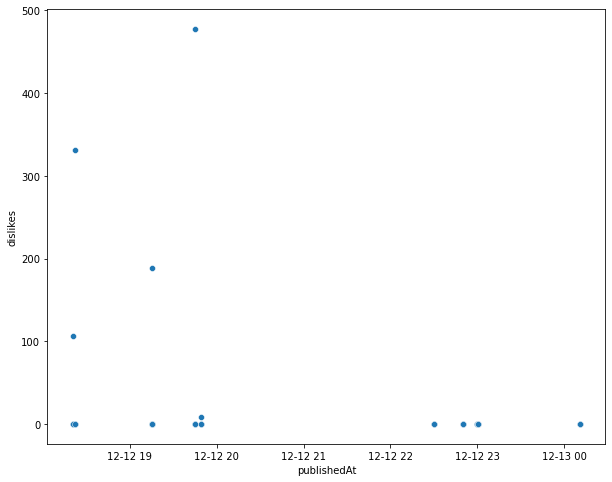

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=yt_trending[(yt_trending.publishedAt > "2021-12-12 17:30:00")
             & (yt_trending.publishedAt < "2021-12-13 01:01:00")],
             x = 'publishedAt',
             y = 'dislikes')

Apparently, some time before 20:00 of 12.12.2021 the last video with non-zero dislikes was published.

Knowing that, let's try to locate the index of that entry and see the concrete time.

In [15]:
yt_trending[(yt_trending.publishedAt > "2021-12-12 19:00:00")
             & (yt_trending.publishedAt < "2021-12-14")
             & (yt_trending.dislikes != 0)].sort_values(by='publishedAt')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
98353,0l5M2TtB8j4,High End Elektro-Sportler: Audi RS e-tron GT v...,2021-12-12 19:15:01+00:00,UCak3selG2oi5vn7sbqdaULA,GRIP - Das Motormagazin,2,2021-12-13 00:00:00+00:00,GRIP|RTL2|Motormagazin|RTLZWEI|Grip Hamid|Grip...,143908,5986,189,515,https://i.ytimg.com/vi/0l5M2TtB8j4/default.jpg,False,False,Sie sind die Speerspitzen von Porsche und Audi...
98359,AL__lS856ug,Max Verstappen is 2021 Formula 1 World Champion!,2021-12-12 19:45:07+00:00,UCQIyqMWCdx1GBvbw_Yi6lEA,Red Bull Racing Honda,17,2021-12-13 00:00:00+00:00,Red Bull Racing|Red Bull F1|Red Bull Red Bull ...,554720,35296,478,1792,https://i.ytimg.com/vi/AL__lS856ug/default.jpg,False,False,"Ladies and Gentlemen, we have a brand-new Worl..."
98362,neGW0_e8zwc,Bin geflasht von der heutigen Leistung I Press...,2021-12-12 19:49:04+00:00,UCDFp4bscTFm8hYxCBx-tIXg,Eintracht Frankfurt,17,2021-12-13 00:00:00+00:00,Eintracht Frankfurt|Eintracht|Frankfurt|SGE|Ei...,29116,1055,8,175,https://i.ytimg.com/vi/neGW0_e8zwc/default.jpg,False,False,Die Pressekonferenz der beiden Trainer nach de...


Here, entry 98362 is our cutoff point. And yet, we cannot just use index for slicing. Let's have a look at the next index.

In [16]:
yt_trending.loc[98363]

video_id                                                   XBiG1LBLSBA
title                                     Wenn Opas Eis essen wollen 😂
publishedAt                                  2021-12-11 19:39:56+00:00
channelId                                     UCj9Co34VgEC2z7OtJzLJQQQ
channelTitle                                           Mehmetaberloyal
categoryId                                                          22
trending_date                                2021-12-13 00:00:00+00:00
tags                                                            [None]
view_count                                                      280337
likes                                                            34372
dislikes                                                           424
comment_count                                                       84
thumbnail_link          https://i.ytimg.com/vi/XBiG1LBLSBA/default.jpg
comments_disabled                                                False
rating

The dislike count is non-zero. The reason is that despite being the next item in terms of index, this entry has completely different publishing date. We could have avoided this by sorting the data by publishing date, but it's not a problem since we are aware of the fact and will use the filtering by timestamps anyway.

Now we know that the last video with dislikes was published on 2021-12-12 19:49:04. We can use this later on.

In [17]:
yt_trending_with_dislikes = yt_trending[(yt_trending.publishedAt < '2021-12-12 19:49:05')]
yt_trending_with_dislikes.shape

(99034, 16)

## Analysis

### Correlation

In [18]:
# Just to have a look at all columns without scrolling up
list(yt_trending.columns)

['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description']

#### Accounting for all dislikes

In [19]:
# Basic correlation matrix
yt_trending_corr = yt_trending[['view_count', 'likes', 'dislikes', 'comment_count']]
yt_trending_corr.corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.841933,0.633250,0.496432
likes,0.841933,1.000000,0.588478,0.674813
dislikes,0.633250,0.588478,1.000000,0.508879
comment_count,0.496432,0.674813,0.508879,1.000000


Text(0.5, 1.0, 'Correlation Heatmap (entire dataset)')

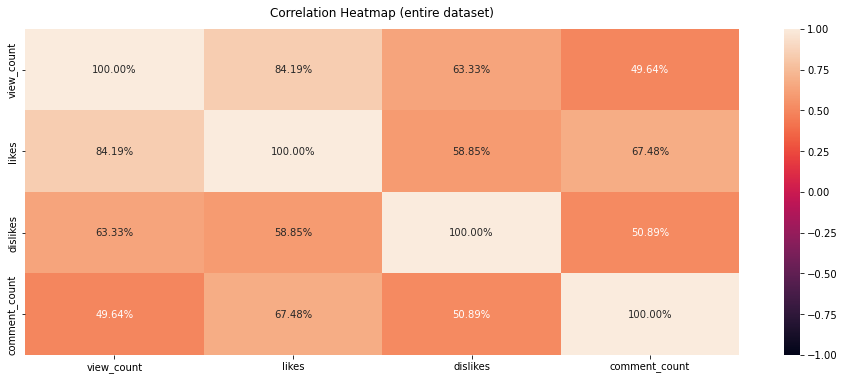

In [20]:
# Correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(yt_trending_corr.corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap (entire dataset)', fontdict={'fontsize':12}, pad=12)

As expected, we see a strong correlation between `view count` and `likes`. A moderate correlation between `view count` and `comment count` is also observed. But both of these statements make sense: in order to like or comment a video people almost always watch it first.

Besides that, we see that people who liked the video are more likely to leave a comment unlike those who disliked it.

While, I imagine, the trend would remain the same, let's have a look at the dataset with valid dislikes.

#### Accounting for factual dislikes

In [21]:
yt_trending_corr_ds = yt_trending_with_dislikes[['view_count', 'likes', 'dislikes', 'comment_count']]
yt_trending_corr_ds.corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.839132,0.714920,0.531750
likes,0.839132,1.000000,0.644367,0.710975
dislikes,0.714920,0.644367,1.000000,0.512274
comment_count,0.531750,0.710975,0.512274,1.000000


Text(0.5, 1.0, 'Correlation Heatmap (dataset with valid dislikes)')

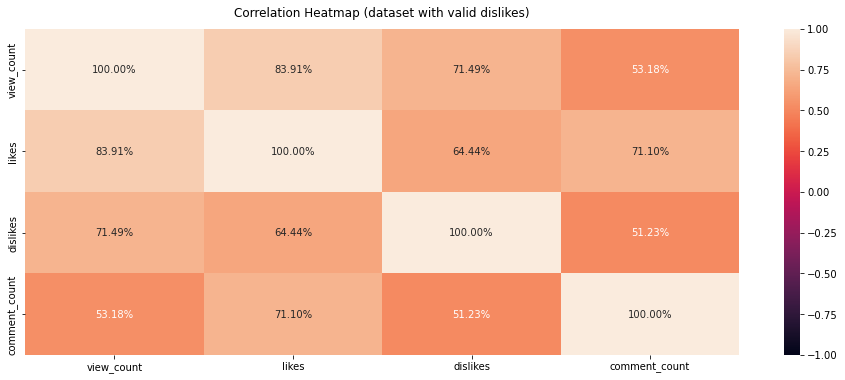

In [22]:
# Correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(yt_trending_corr_ds.corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap (dataset with valid dislikes)', fontdict={'fontsize':12}, pad=12)

Now we still observe strong correlation between `view count` and `likes`, but also a decent correlation of the former with `dislikes`.

Here it is much clearer that people who leave a like would also possibly leave a comment.

#### Comparing linear relationships

[Text(0.5, 1.0, 'Views vs likes')]

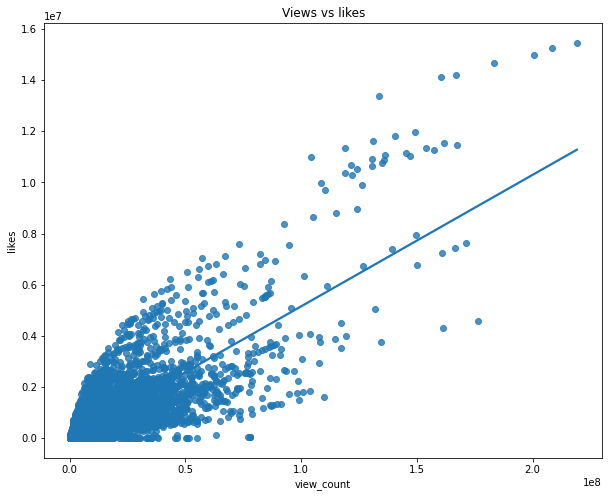

In [23]:
# Likes

plt.figure(figsize=(10, 8))
sns.regplot(data=yt_trending, x='view_count', y='likes', ci=None).set(title='Views vs likes')

This graph visually shows a quite nice linear relationship between views and likes.

[Text(0.5, 1.0, 'Dataset with valid dislikes')]

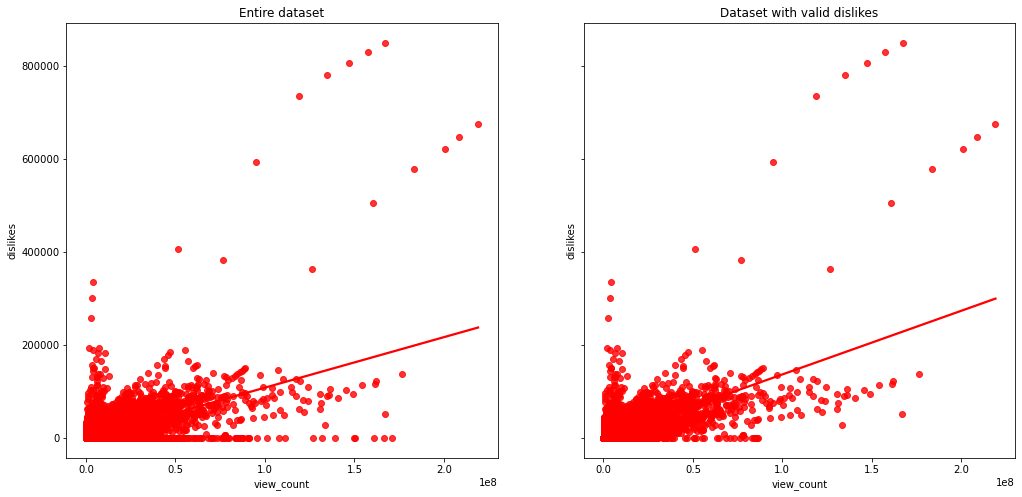

In [24]:
# Dislikes

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(17, 8))

# Entire dataset
sns.regplot(data=yt_trending, x='view_count', y='dislikes',
            ci=None, color = 'red', ax=axs[0]).set(title='Entire dataset')
# Dataset with valid dislikes
sns.regplot(data=yt_trending_with_dislikes, x='view_count', y='dislikes',
            ci=None, color = 'red', ax=axs[1]).set(title='Dataset with valid dislikes')

As for dislikes the relationship is still linear, but the correlation is much lower which is noticeable by looking at the slope. Also, it is clear from the entire dataset, that dislikes with a value of 0 indeed skew the regression decreasing the slope even further.

Notice a high correlation between views and likes. That makes sense!
people who like a video tend to leave a comment and vice versa. Howver people who dislike tend not to leave a comment or vice versa.

### Most (un)/popular videos

In [25]:
# Just to have a look at all columns without scrolling up
list(yt_trending.columns)

['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description']

#### Videos with the most likes

In [26]:
# The most liked video
yt_trending.loc[yt_trending['likes'].idxmax()]

video_id                                                   gdZLi9oWNZg
title                               BTS (방탄소년단) 'Dynamite' Official MV
publishedAt                                  2020-08-21 03:58:10+00:00
channelId                                     UC3IZKseVpdzPSBaWxBxundA
channelTitle                                            Big Hit Labels
categoryId                                                          10
trending_date                                2020-08-27 00:00:00+00:00
tags                                   BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
view_count                                                   219110491
likes                                                         15460845
dislikes                                                        674292
comment_count                                                  5810618
thumbnail_link          https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg
comments_disabled                                                False
rating

In [27]:
# TOP 10 most liked videos
top10_likes = (yt_trending[['title', 'likes']].groupby('title')
                                .sum()
                                .sort_values(by = 'likes', ascending = False)
                                .head(10)
                                .reset_index()
                                .rename(columns={'title': 'Title', 'likes': 'Cumulative likes'}))

top10_likes.index = top10_likes.index + 1   # considering Python starts numeration from 0, I would add 1 to index to make it look nicer

top10_likes

,Title,Cumulative likes
1,BTS (방탄소년단) 'Dynamite' Official MV,91448368
2,LISA - 'LALISA' M/V,74742321
3,BTS (방탄소년단) 'Permission to Dance' Official MV,69665035
4,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,68359343
5,"$456,000 Squid Game In Real Life!",48577517
6,Crazy #alluarjun #painting #shorts #viral #tr...,47168648
7,BLACKPINK – ‘Lovesick Girls’ M/V,45530096
8,BTS (방탄소년단) 'Life Goes On' Official MV,44825781
9,PSY - 'That That (prod. & feat. SUGA of BTS)' MV,38823209
10,EXO 엑소 'Don't fight the feeling' MV,38638071


#### Videos with the most dislikes

In [28]:
# The most disliked video
yt_trending.loc[yt_trending['dislikes'].idxmax()]

video_id                                                   vRXZj0DzXIA
title                  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
publishedAt                                  2020-08-28 04:00:11+00:00
channelId                                     UCOmHUn--16B90oW2L6FRR3A
channelTitle                                                 BLACKPINK
categoryId                                                          10
trending_date                                2020-09-03 00:00:00+00:00
tags                 YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
view_count                                                   167334429
likes                                                         11474616
dislikes                                                        848975
comment_count                                                  2710904
thumbnail_link          https://i.ytimg.com/vi/vRXZj0DzXIA/default.jpg
comments_disabled                                                False
rating

In [29]:
# TOP 10 most disliked videos
top10_dislikes = (yt_trending[['title', 'dislikes']].groupby('title')
                                .sum()
                                .sort_values(by = 'dislikes', ascending = False)
                                .head(10)
                                .reset_index()
                                .rename(columns={'title': 'Title', 'dislikes': 'Cumulative dislikes'}))

top10_dislikes.index = top10_dislikes.index + 1   # considering Python starts numeration from 0, I would add 1 to index to make it look nicer

top10_dislikes

,Title,Cumulative dislikes
1,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,4995212
2,BTS (방탄소년단) 'Dynamite' Official MV,3553916
3,Guess the sound challenge🎵 #shorts,1125189
4,HOW CRYPTOCURRENCY WORKS 💸👨🏻‍💻,1109455
5,Merve Yalçın - Bella (Official Video),1086459
6,MvRyhan Funny videos #tiktok #Shorts,934935
7,Dream - Mask (Official Music Video),930022
8,Spider-Man saved the girl from the Villain 😱❤️...,830212
9,Элджей & MORGENSHTERN - Lollipop,698461
10,Turn into egg - Tutorial #Shorts,665384


#### Videos with the most comments

In [30]:
# The most commented video
yt_trending.loc[yt_trending['comment_count'].idxmax()]

video_id                                                   WMweEpGlu_U
title                                 BTS (방탄소년단) 'Butter' Official MV
publishedAt                                  2021-05-21 03:46:13+00:00
channelId                                     UC3IZKseVpdzPSBaWxBxundA
channelTitle                                               HYBE LABELS
categoryId                                                          10
trending_date                                2021-05-23 00:00:00+00:00
tags                                   BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
view_count                                                   166895681
likes                                                         14202546
dislikes                                                         51664
comment_count                                                  5987755
thumbnail_link          https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg
comments_disabled                                                False
rating

In [ ]:
# TOP 10 most commented videos
top10_com = (yt_trending[['title', 'comment_count']].groupby('title')
                                .sum()
                                .sort_values(by = 'comment_count', ascending = False)
                                .head(10)
                                .reset_index()
                                .rename(columns={'title': 'Title', 'comment_count': 'Cumulative comment count'}))

top10_com.index = top10_com.index + 1   # considering Python starts numeration from 0, I would add 1 to index to make it look nicer

top10_com

,Title,Cumulative comment count
1,BTS (방탄소년단) 'Dynamite' Official MV,35601303
2,EXO 엑소 'Don't fight the feeling' MV,25677362
3,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,17732864
4,BTS (방탄소년단) 'Life Goes On' Official MV,17662066
5,BTS (방탄소년단) 'Permission to Dance' Official MV,17455673
6,LISA - 'LALISA' M/V,17260976
7,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,16059063
8,BTS (방탄소년단) 'Butter' Official MV,14985314
9,BTS (방탄소년단) 'Film out' Official MV,11321689
10,TWICE Alcohol-Free M/V,8379302
